# Plot data

In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# put data into dataframes
data = json.load(open('aircraft_data.json'))
current_data = {airline:{a:i['in service'] for a,i in airline_data['aircraft_data'].items()} for airline, airline_data in data.items()}
orders_data = {airline:{a:i['orders'] for a,i in airline_data['aircraft_data'].items()} for airline, airline_data in data.items()}

In [3]:
# clean up data
current_df = pd.DataFrame(current_data,dtype='int32').fillna(0).astype(int)
orders_df = pd.DataFrame(orders_data,dtype='int32').fillna(0).astype(int)

current_df = current_df.loc[ ~current_df.index.str.contains('F')] # remove freighter types
orders_df = orders_df.loc[ ~orders_df.index.str.contains('F')] # remove freighter types

In [4]:
current_df.head(5)

,aeroflot,air canada,air china,air france,air new zealand,alaska,alitalia,all nippon,american,british,...,qatar,royal air maroc,ryanair,sas,south african,southwest,tap portugal,turkish airlines,united,virgin atlantic
ATR 72-500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATR 72-600,0,0,0,0,0,0,0,0,0,0,...,0,5,0,9,0,0,0,0,0,0
Airbus A318-100,0,0,0,18,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Airbus A319-100,0,15,33,38,0,10,22,0,125,44,...,0,0,0,4,8,0,0,7,63,0
Airbus A319-100LR,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


# By airline

In [5]:
airlines = ['etihad','qatar']
airlines = ['united','american','delta']
#airlines = ['british','air france','lufthansa']
#airlines = ['korean','all nippon','japan airlines']
min = 3

In [8]:
min = 0
def select_row(row):
    """
    return True when any row element is greater than 'min'
    """
    return any(i>min for i in row)

In [9]:
# drop all columns except those requested
current_airline_df = current_df[airlines]
orders_airline_df = orders_df.loc[:,airlines]

# drop zeros
current_airline_df = current_airline_df[ current_airline_df.apply(select_row,axis=1)]
orders_airline_df = orders_airline_df[ orders_airline_df.apply(select_row,axis=1)]

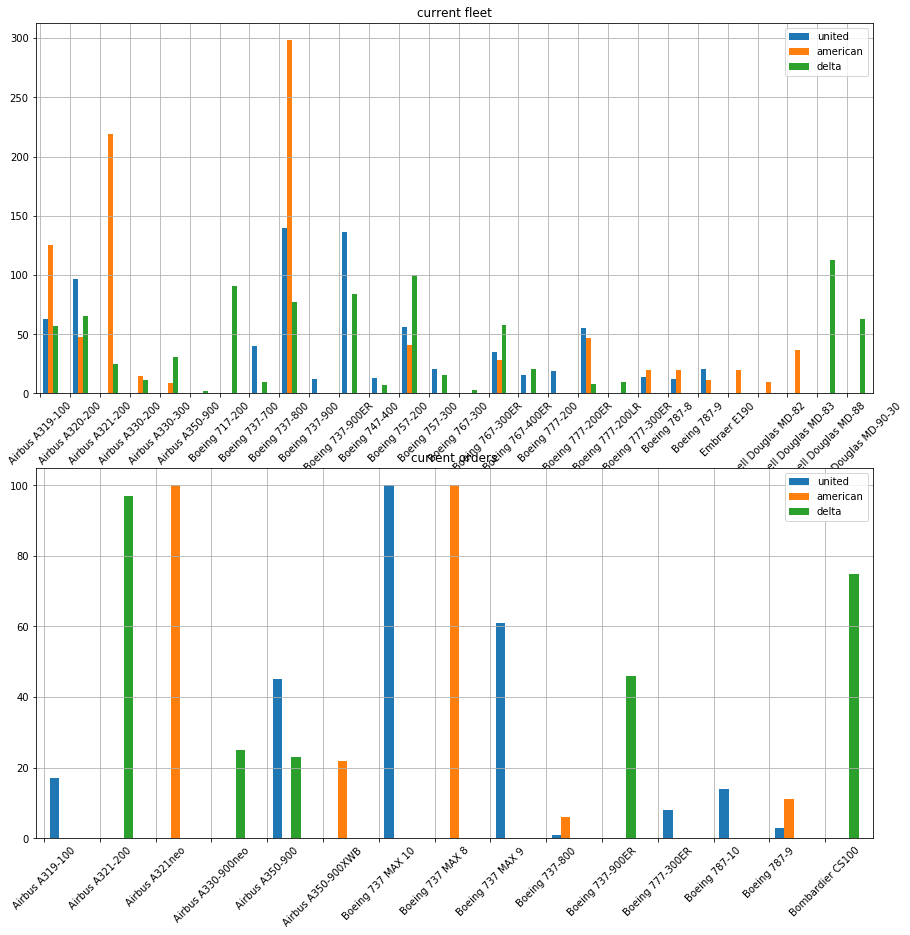

In [10]:
fig1,axes = plt.subplots(2,figsize=[20,15])
_ = current_airline_df.plot(kind='bar',
                            ax=axes[0],
                            grid=True,
                            rot=45,
                            position=-0.2,
                            title='current fleet')
_ = orders_airline_df.plot(kind='bar',
                           ax=axes[1],
                           grid=True,
                           rot=45,
                           position=-0.2,
                           title='current orders')
fig1.set_figwidth(15)
plt.legend(loc='best')

# By aircraft

In [11]:
aircraft = ['Airbus A320neo','Airbus A321neo']
aircraft = ['Boeing 787-8','Boeing 787-9','Boeing 787-10']
#aircraft = ['Boeing 777-300ER','Boeing 777-200ER','Boeing 777-300','Boeing 777-200']
#aircraft = ['Boeing 747-8']
#aircraft = ['Airbus A380-800']
#aircraft = ['Airbus A330-200','Airbus A330-300']
#aircraft = ['Airbus A330-800neo']#,'Airbus A330-900neo']

min = 0

In [12]:
current_aircraft_df = current_df.loc[aircraft].transpose()
current_aircraft_df = current_aircraft_df[current_aircraft_df.apply(select_row,axis=1)]

orders_aircraft_df = orders_df.loc[aircraft].transpose()
orders_aircraft_df = orders_aircraft_df[orders_aircraft_df.apply(select_row,axis=1)]

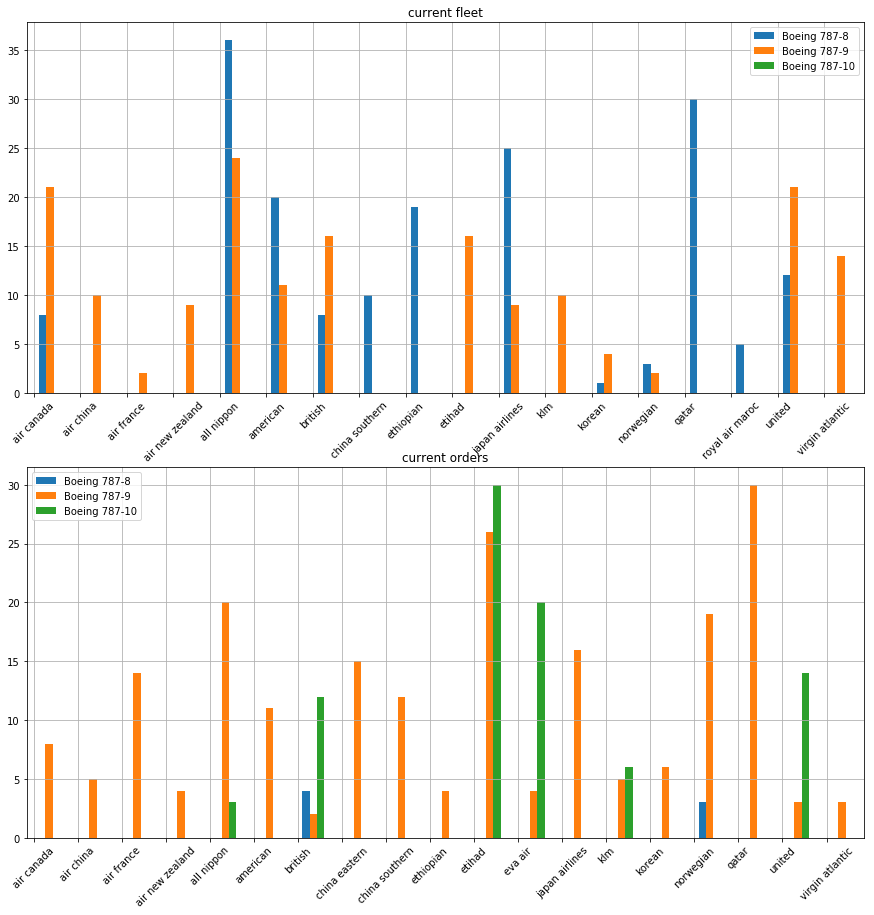

In [13]:
fig1,axes = plt.subplots(2,figsize=[20,15])
_ = current_aircraft_df.plot(kind='bar',
                            ax=axes[0],
                            grid=True,
                            rot=45,
                            position=-0.2,
                            title='current fleet')
_ = orders_aircraft_df.plot(kind='bar',
                           ax=axes[1],
                           grid=True,
                           rot=45,
                           position=-0.2,
                           title='current orders')
fig1.set_figwidth(15)
plt.legend(loc='best')